<a href="https://colab.research.google.com/github/jcarvaj18643/universidad-Taller1-Recomendacion/blob/main/Perceptron_Taller_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import make_classification
import pandas as pd

In [11]:
##https://nuelgaloproductos.s3.amazonaws.com/perceptron/heart_failure_clinical_records_dataset.csv
data = pd.read_csv('https://nuelgaloproductos.s3.amazonaws.com/perceptron/heart_failure_clinical_records_dataset.csv')

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [12]:
X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']


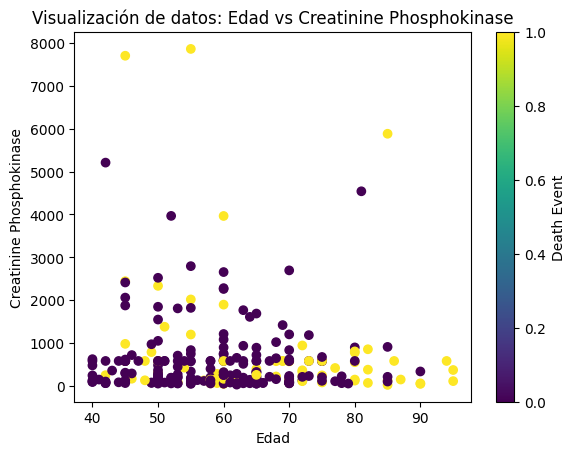

In [14]:
import matplotlib.pyplot as plt

# Seleccionamos dos características (por ejemplo, edad y creatinine_phosphokinase)
X_viz = X[['age', 'creatinine_phosphokinase']].values

# Crear gráfico de dispersión
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y, cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Creatinine Phosphokinase')
plt.title('Visualización de datos: Edad vs Creatinine Phosphokinase')
plt.colorbar(label='Death Event')
plt.show()

In [15]:
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, y)

Perceptron()

In [16]:
clf.score(X, y)

0.6789297658862876

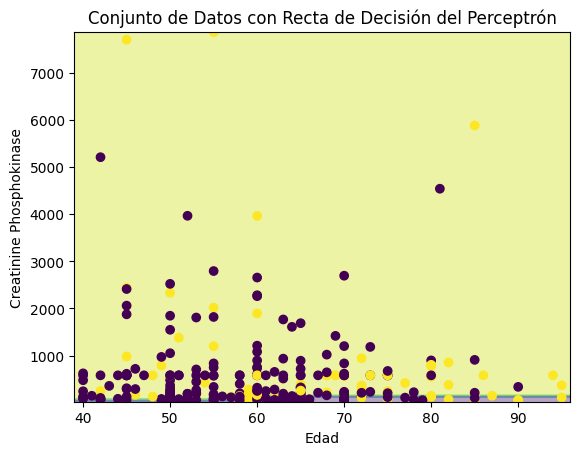

In [18]:
X_viz = X[['age', 'creatinine_phosphokinase']].values

# Entrenar nuevamente el modelo Perceptron con estas dos características
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_viz, y)

# Crear una malla de puntos para representar la recta de decisión
xx, yy = np.meshgrid(np.linspace(X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1, 100),
                     np.linspace(X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1, 100))

# Predecir las etiquetas para cada punto de la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la recta de decisión
plt.contourf(xx, yy, Z, alpha=0.4)

# Dibujar los puntos de datos
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y, cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Creatinine Phosphokinase')
plt.title('Conjunto de Datos con Recta de Decisión del Perceptrón')
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ajustar el modelo de regresión logística con más iteraciones
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_scaled, y)

# Ver el puntaje de precisión
accuracy = clf.score(X_scaled, y)
print(f"Precisión del modelo de Regresión Logística: {accuracy * 100:.2f}%")

Precisión del modelo de Regresión Logística: 85.28%


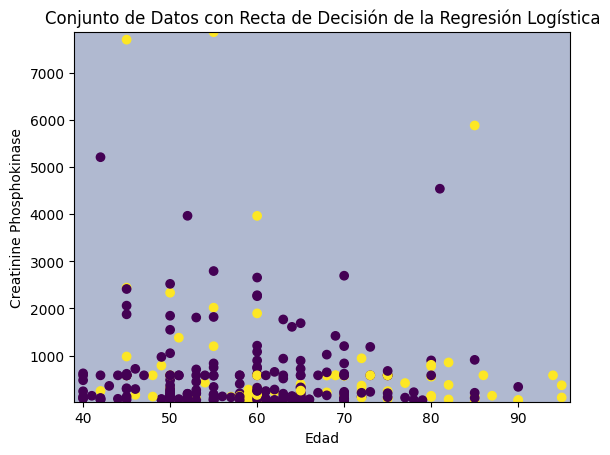

In [22]:
# Seleccionamos solo dos características para la visualización (ej: 'age' y 'creatinine_phosphokinase')
X_viz = X[['age', 'creatinine_phosphokinase']].values
X_viz_scaled = scaler.fit_transform(X_viz)

# Entrenar nuevamente el modelo de regresión logística con las dos características
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_viz_scaled, y)

# Crear una malla de puntos para representar la recta de decisión
xx, yy = np.meshgrid(np.linspace(X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1, 100),
                     np.linspace(X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1, 100))

# Predecir las etiquetas para cada punto de la malla
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Dibujar la recta de decisión
plt.contourf(xx, yy, Z, alpha=0.4)

# Dibujar los puntos de datos
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y, cmap='viridis')
plt.xlabel('Edad')
plt.ylabel('Creatinine Phosphokinase')
plt.title('Conjunto de Datos con Recta de Decisión de la Regresión Logística')
plt.show()

In [24]:
data = pd.read_csv('https://nuelgaloproductos.s3.amazonaws.com/perceptron/heart_failure_clinical_records_dataset.csv')

X = data.drop(columns=['DEATH_EVENT'])
y = data['DEATH_EVENT']


In [25]:
from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X)

# Verificamos los datos normalizados
print("Datos normalizados:")
print(X_scaled[:5])

Datos normalizados:
[[ 1.19294523e+00 -8.71104775e-01  1.65728387e-04 -8.47579380e-01
  -1.53055953e+00  1.35927151e+00  1.68164843e-02  4.90056987e-01
  -1.50403612e+00  7.35688190e-01 -6.87681906e-01 -1.62950241e+00]
 [-4.91279276e-01 -8.71104775e-01  7.51463953e+00 -8.47579380e-01
  -7.07675018e-03 -7.35688190e-01  7.53566018e-09 -2.84552352e-01
  -1.41976151e-01  7.35688190e-01 -6.87681906e-01 -1.60369074e+00]
 [ 3.50832977e-01 -8.71104775e-01 -4.49938761e-01 -8.47579380e-01
  -1.53055953e+00 -7.35688190e-01 -1.03807313e+00 -9.09000174e-02
  -1.73104612e+00  7.35688190e-01  1.45416070e+00 -1.59078490e+00]
 [-9.12335403e-01  1.14796753e+00 -4.86071002e-01 -8.47579380e-01
  -1.53055953e+00 -7.35688190e-01 -5.46474088e-01  4.90056987e-01
   8.50338444e-02  7.35688190e-01 -6.87681906e-01 -1.59078490e+00]
 [ 3.50832977e-01  1.14796753e+00 -4.35485864e-01  1.17983050e+00
  -1.53055953e+00 -7.35688190e-01  6.51798584e-01  1.26466633e+00
  -4.68217606e+00 -1.35927151e+00 -6.87681906e-01 -1

In [26]:
from sklearn.model_selection import train_test_split

# Dividimos los datos en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verificamos las dimensiones de los conjuntos
print(f"Tamaño de X_train: {X_train.shape}")
print(f"Tamaño de X_test: {X_test.shape}")
print(f"Tamaño de y_train: {y_train.shape}")
print(f"Tamaño de y_test: {y_test.shape}")

Tamaño de X_train: (239, 12)
Tamaño de X_test: (60, 12)
Tamaño de y_train: (239,)
Tamaño de y_test: (60,)


                     Feature  Coefficient
7           serum_creatinine     0.727839
0                        age     0.655280
3                   diabetes     0.164332
2   creatinine_phosphokinase     0.113132
10                   smoking     0.071764
1                    anaemia    -0.051719
5        high_blood_pressure    -0.061112
6                  platelets    -0.176233
8               serum_sodium    -0.259614
9                        sex    -0.361586
4          ejection_fraction    -0.888779
11                      time    -1.638204


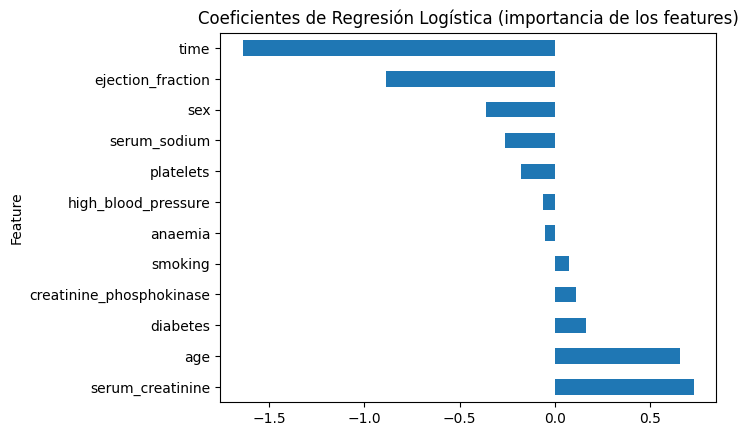

In [27]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo de Regresión Logística
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)

# Ver los coeficientes del modelo para cada característica
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': clf.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

# Visualizar las características más importantes
coefficients.plot(kind='barh', x='Feature', y='Coefficient', legend=False)
plt.title('Coeficientes de Regresión Logística (importancia de los features)')
plt.show()

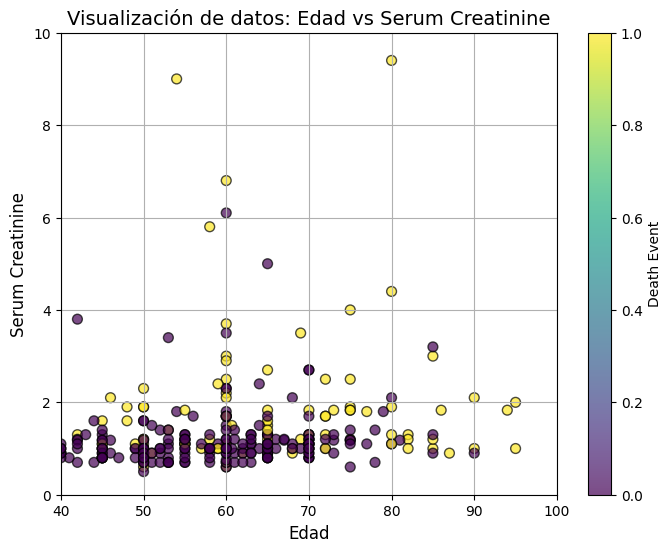

In [30]:
import matplotlib.pyplot as plt

# Crear gráfico de dispersión con mejoras visuales
plt.figure(figsize=(8, 6))
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

# Configurar etiquetas y título
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Serum Creatinine', fontsize=12)
plt.title('Visualización de datos: Edad vs Serum Creatinine', fontsize=14)

# Añadir colorbar
plt.colorbar(label='Death Event')

# Mejorar los límites de los ejes
plt.xlim([40, 100])
plt.ylim([0, 10])

plt.grid(True)
plt.show()

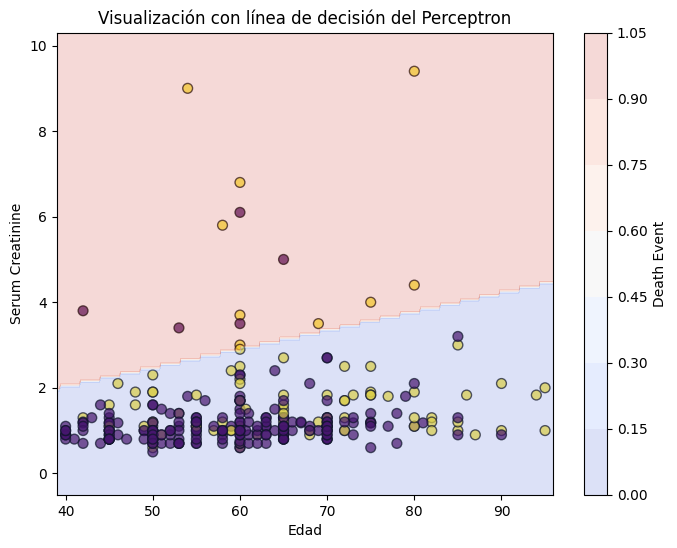

In [31]:
from sklearn.linear_model import Perceptron
import numpy as np

# Seleccionar las dos mejores características
X_viz = X[['age', 'serum_creatinine']].values

# Entrenar el modelo de Perceptron
perceptron_model = Perceptron(tol=1e-3, random_state=0)
perceptron_model.fit(X_viz, y)

# Crear una malla de puntos para visualizar la frontera de decisión
x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predecir en cada punto de la malla
Z = perceptron_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los puntos de datos
plt.figure(figsize=(8, 6))
plt.scatter(X_viz[:, 0], X_viz[:, 1], c=y, cmap='viridis', s=50, alpha=0.7, edgecolor='k')

# Dibujar la frontera de decisión
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

plt.xlabel('Edad')
plt.ylabel('Serum Creatinine')
plt.title('Visualización con línea de decisión del Perceptron')
plt.colorbar(label='Death Event')
plt.show()